<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/Histogram_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

#Load data

In [143]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
public_data = df_train.drop(['Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
PA_data = df_test.drop(['Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
public_labels = df_train.Histology

In [0]:
PA_labels = df_test.Histology

In [153]:
public_data.columns

Index(['Histology', 'VoxelVolume', 'Maximum3DDiameter', 'MeshVolume',
       'MajorAxisLength', 'Sphericity', 'LeastAxisLength', 'Elongation',
       'SurfaceVolumeRatio', 'Maximum2DDiameterSlice',
       ...
       'HighGrayLevelZoneEmphasis', 'SmallAreaEmphasis',
       'LowGrayLevelZoneEmphasis', 'ZoneEntropy',
       'SmallAreaLowGrayLevelEmphasis', 'Coarseness', 'Complexity', 'Strength',
       'Contrast.1', 'Busyness'],
      dtype='object', length=108)

#Histograms

In [0]:
colors = {'adenocarcinoma': 'r', 'large cell': 'b', 'squamous cell carcinoma': 'g'}

Histology
adenocarcinoma             [[AxesSubplot(0.125,0.826071;0.0610236x0.05392...
large cell                 [[AxesSubplot(0.125,0.826071;0.0610236x0.05392...
squamous cell carcinoma    [[AxesSubplot(0.125,0.826071;0.0610236x0.05392...
dtype: object

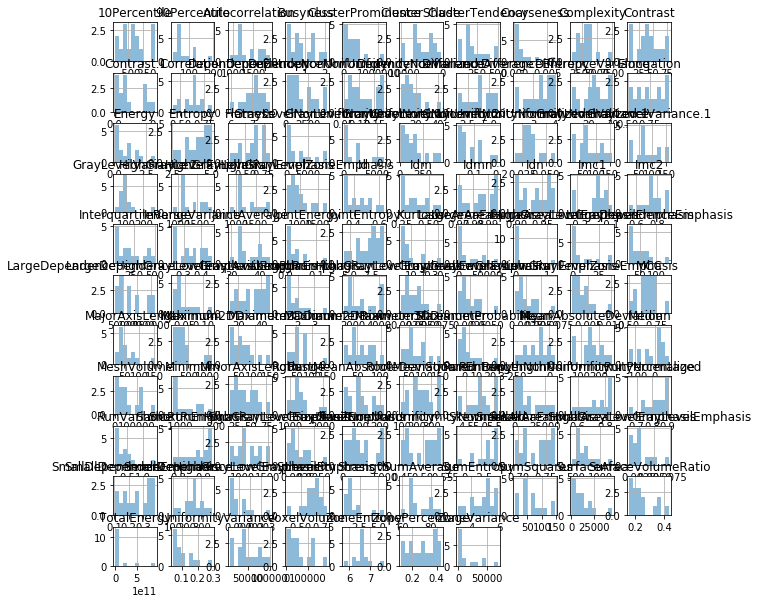

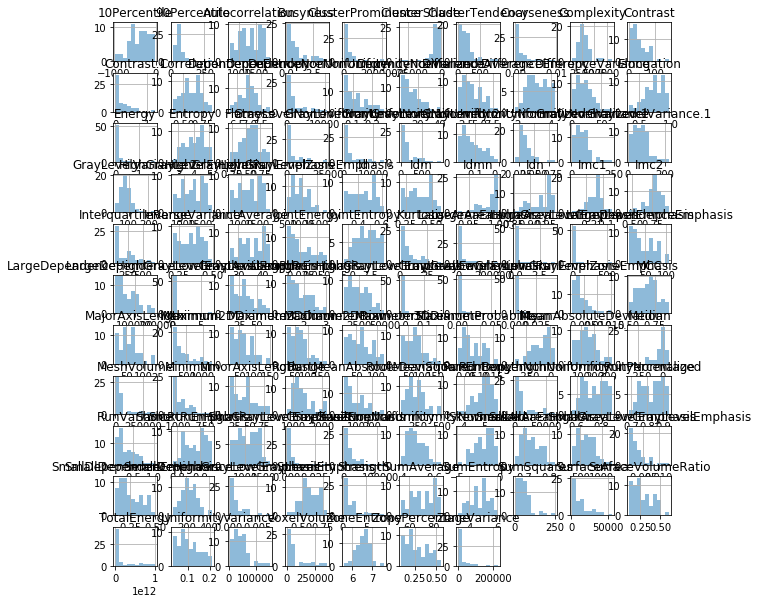

Error in callback <function flush_figures at 0x7fcc241439d8> (for post_execute):


KeyboardInterrupt: ignored

In [155]:
public_data.groupby('Histology').hist(stacked=True, alpha=0.5, figsize=(10, 10))


Histology
adenocarcinoma             AxesSubplot(0.125,0.125;0.775x0.755)
large cell                 AxesSubplot(0.125,0.125;0.775x0.755)
squamous cell carcinoma    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Maximum, dtype: object

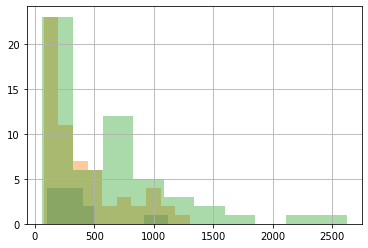

In [156]:
public_data.groupby('Histology').Maximum.hist(alpha=0.4)

KeyboardInterrupt: ignored

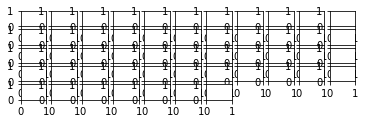

In [157]:
public_data.hist(by='Maximum', figsize=(6, 4))

In [0]:
plt.subplot(1,2,1)
public_data.groupby("Histology").Maximum.hist(alpha=1, histtype='step', linewidth=3)
plt.subplot(1,2,2)
PA_data.groupby("Histology").Maximum.hist(alpha=1, histtype='step', linewidth=3)

In [0]:
#sns.pairplot(public_data, hue='Histology')
#ci vuole troppo tempo

Faccio a gruppi di features separatamente

In [0]:
public_data.head()

Histology    VoxelVolume  ...  Contrast.1  Busyness
0  adenocarcinoma   51905.377962  ...    0.020920  1.306338
1  adenocarcinoma   13432.502747  ...    0.146173  0.253533
2  adenocarcinoma   25843.872675  ...    0.152919  0.611772
3  adenocarcinoma   22152.709032  ...    0.351327  0.564313
4  adenocarcinoma  119385.805617  ...    0.132602  1.804351

[5 rows x 108 columns]

In [0]:
public_data.iloc[:,0:5].head()

Histology    VoxelVolume  ...     MeshVolume  MajorAxisLength
0  adenocarcinoma   51905.377962  ...   51847.748274        50.574214
1  adenocarcinoma   13432.502747  ...   13312.697411        48.354803
2  adenocarcinoma   25843.872675  ...   25724.437234        39.406474
3  adenocarcinoma   22152.709032  ...   22099.016776        38.640414
4  adenocarcinoma  119385.805617  ...  119150.752851        75.629327

[5 rows x 5 columns]

#Pairplot shape features

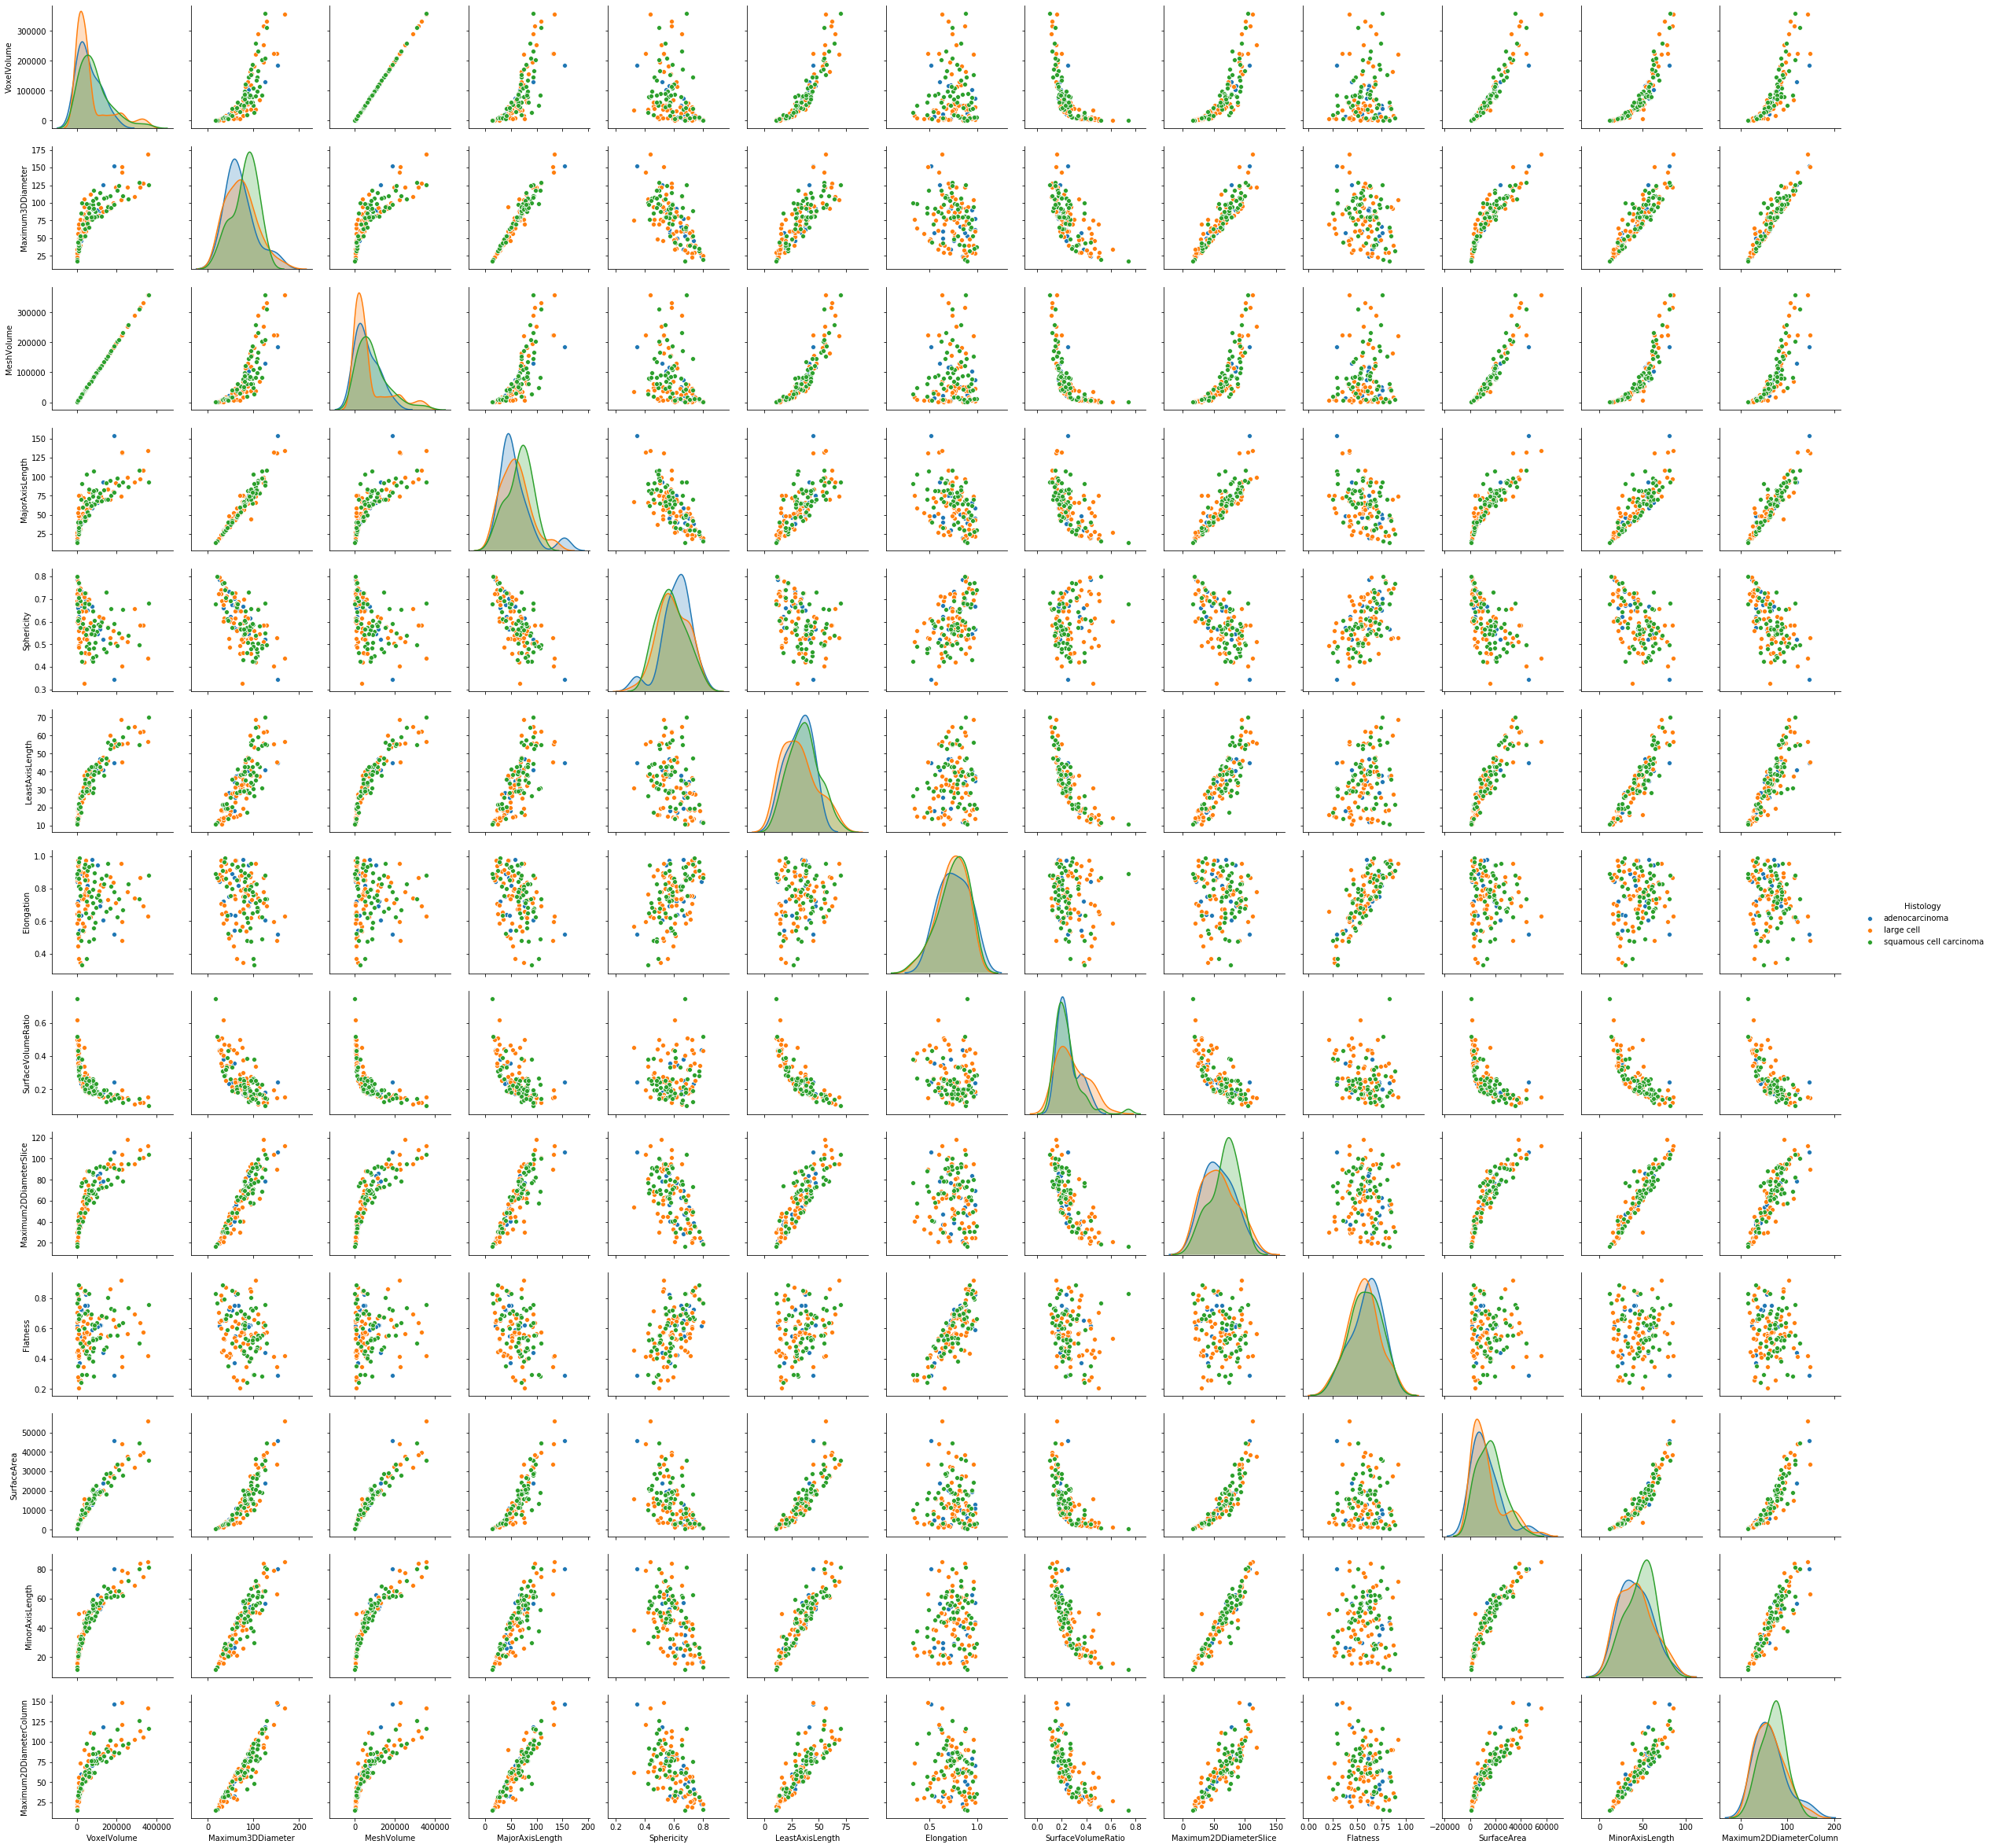

In [0]:
sns.pairplot(public_data.iloc[:,0:14], hue='Histology')

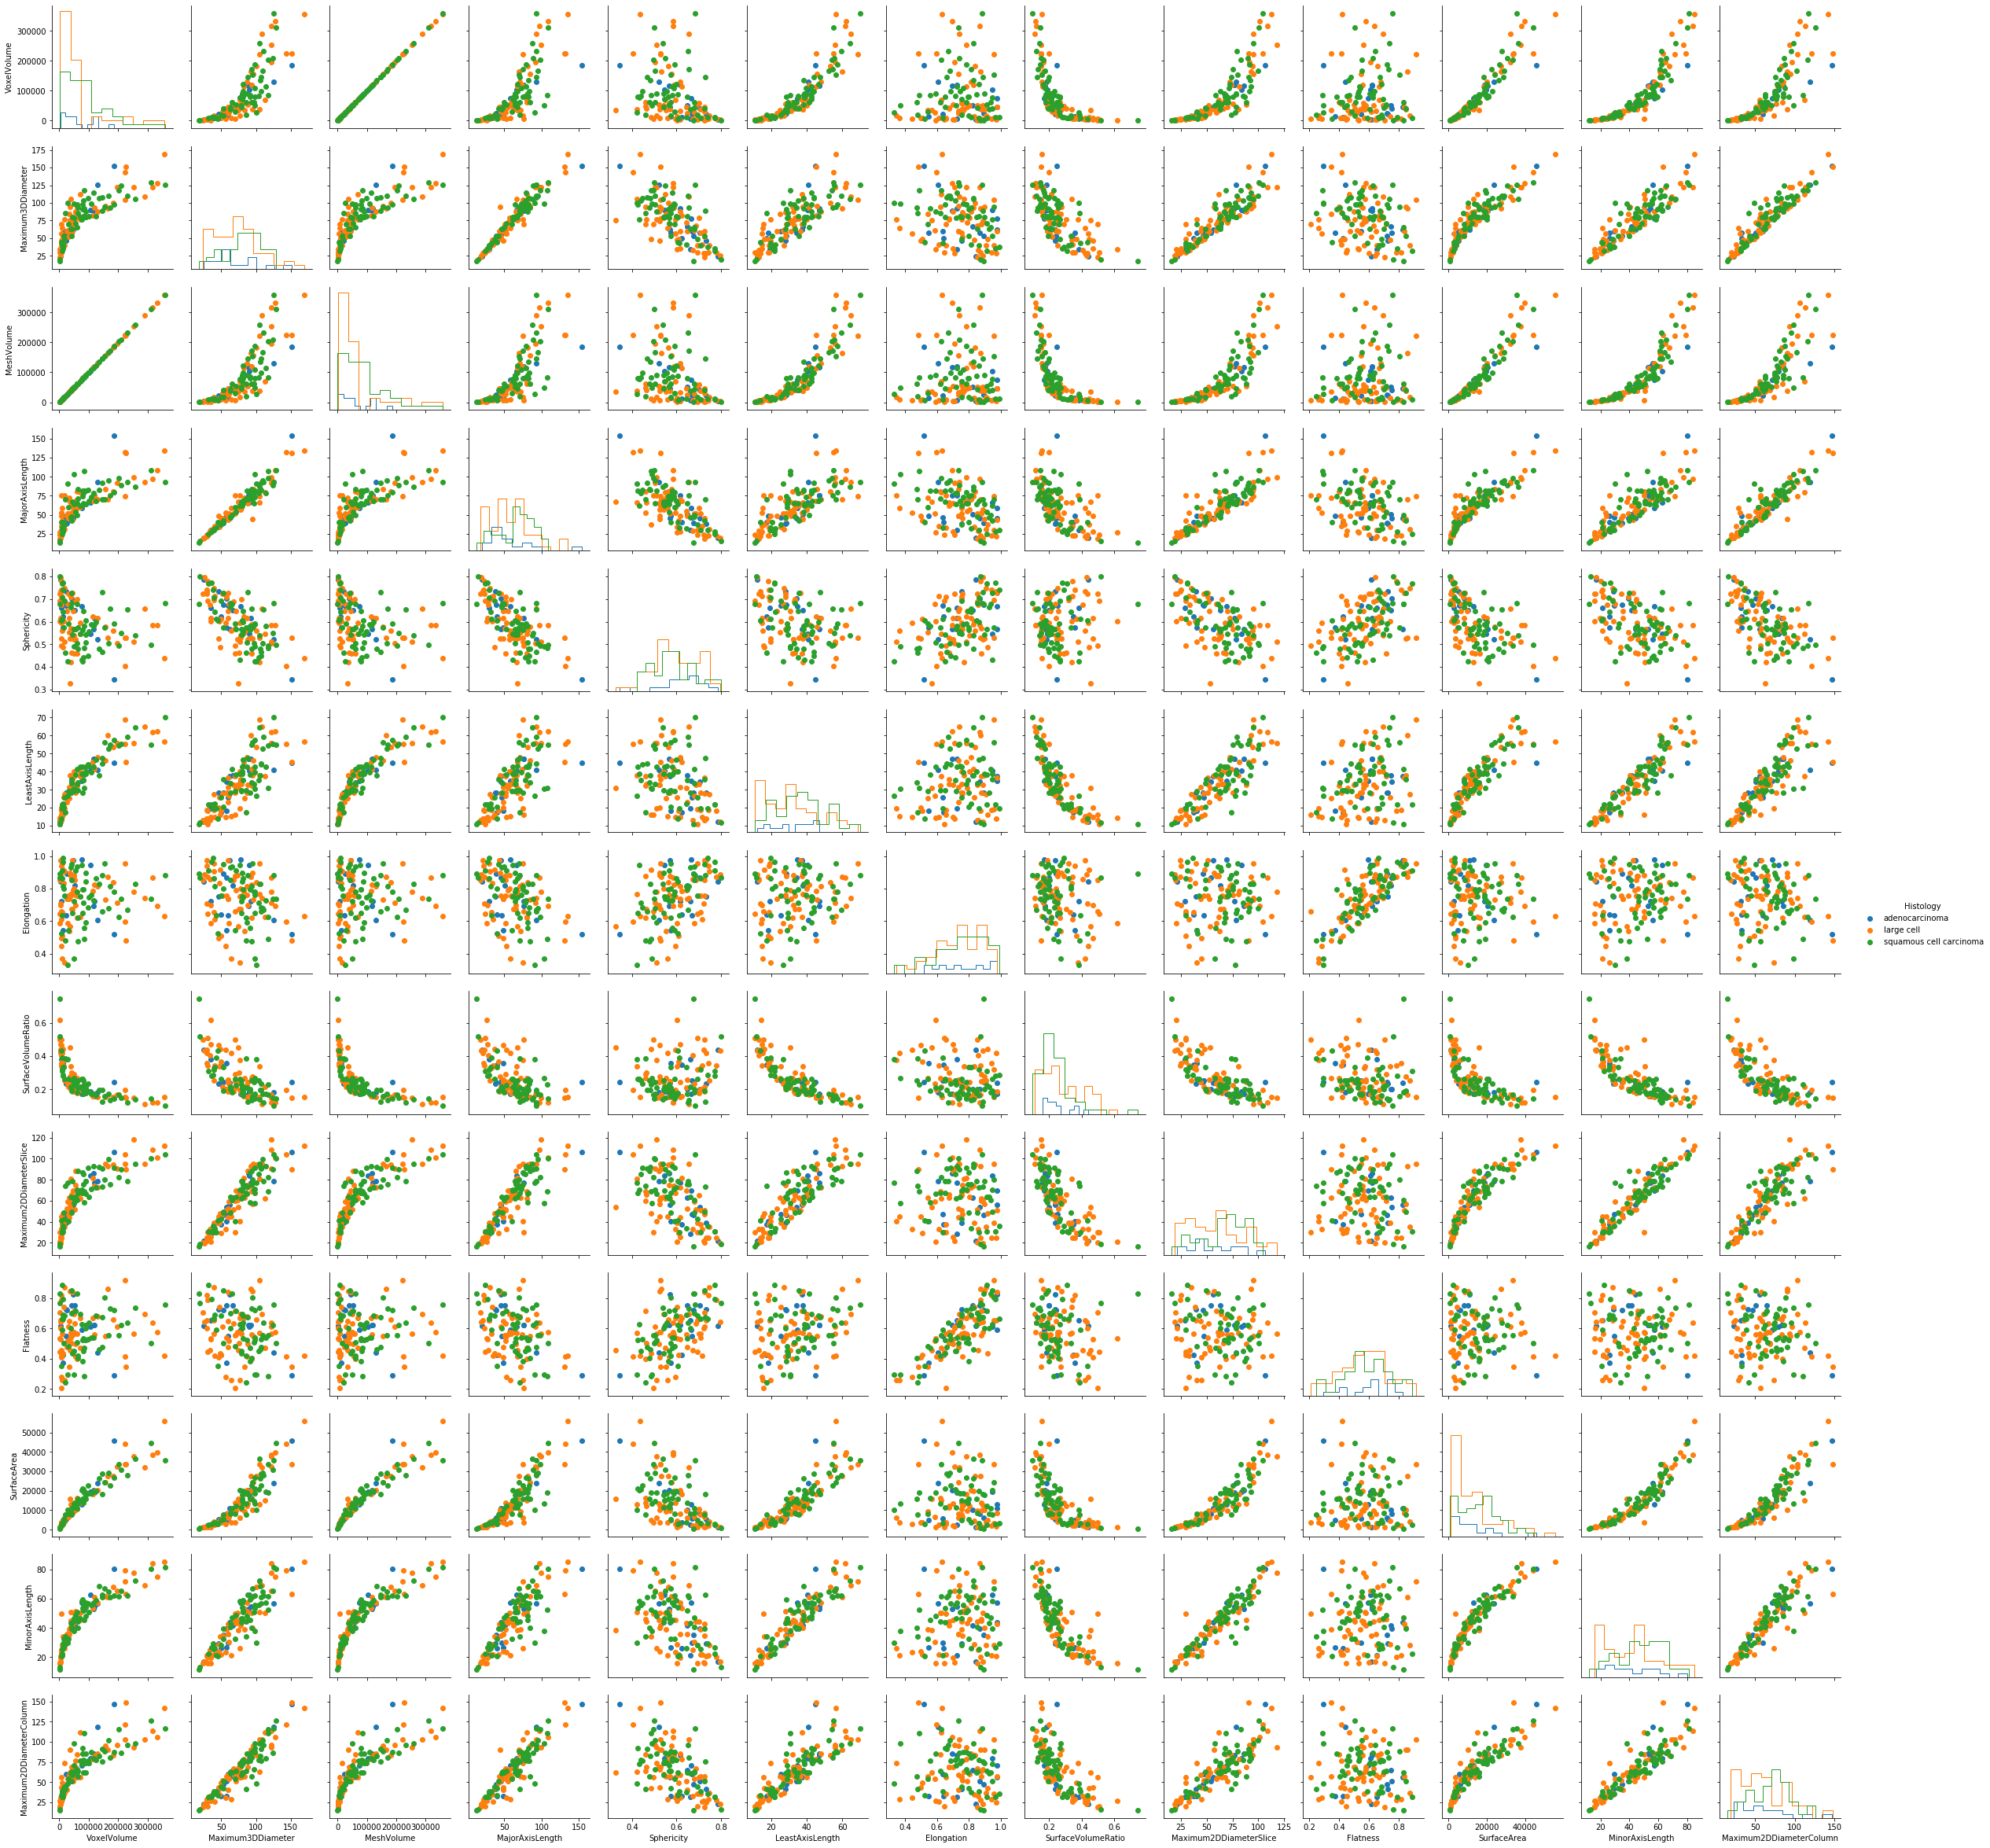

In [0]:
  g = sns.PairGrid(public_data.iloc[:,0:14], hue="Histology")
  g.map_diag(plt.hist, histtype="step")
  g.map_offdiag(plt.scatter)
  g.add_legend()

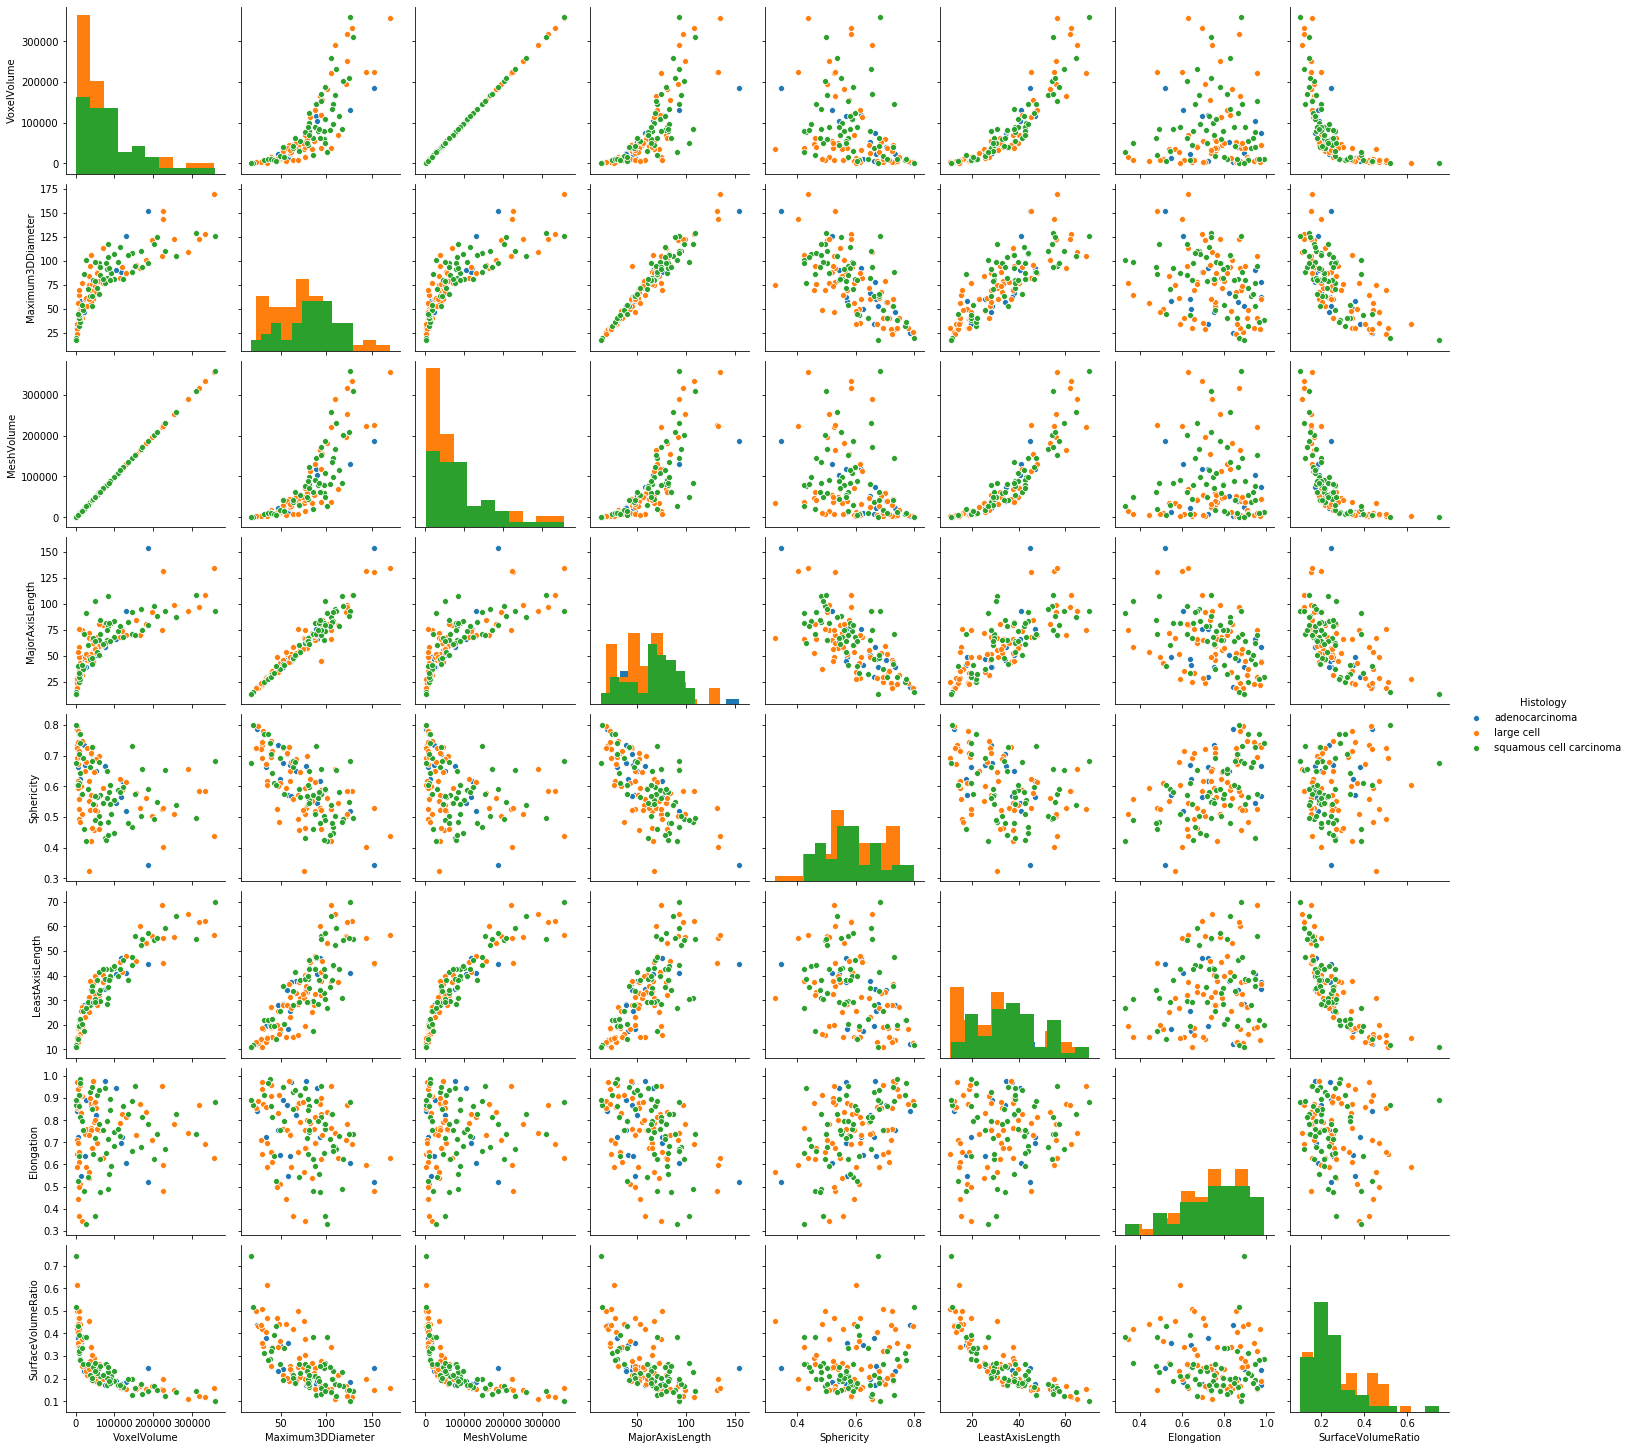

In [0]:
sns.pairplot(public_data.iloc[:,0:9], hue='Histology', diag_kind='hist')

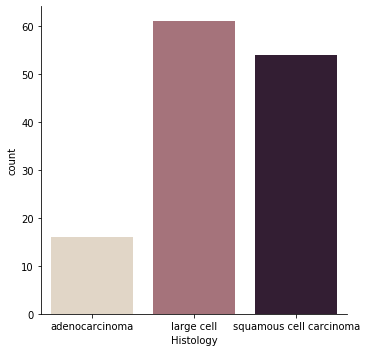

In [0]:
sns.catplot(x="Histology", kind="count", palette="ch:.25", data=public_data)

#OK!!!!!!!!!!!!!! Funziona!!!!!!!!!!!!!!!!

In [0]:
type(g)

seaborn.axisgrid.FacetGrid

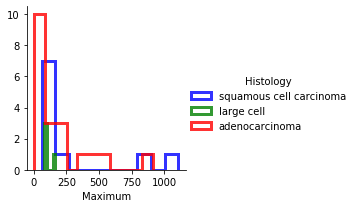

In [0]:
g = sns.FacetGrid(PA_data, hue="Histology", palette={'adenocarcinoma':'r', 'large cell':'g', 'squamous cell carcinoma':'b'})
g = g.map(sns.distplot, "Maximum", hist=True, kde=False, hist_kws={'alpha':0.8,'histtype':'step', 'linewidth':3})
g.add_legend(title='Histology') 

VERSIONE ALTERNATIVA DEFINENDO UNA FUNZIONE

In [0]:
def distplot_with_hue(data=None, x=None, hue=None, row=None, col=None, palette=None, legend=True, **kwargs):
    _, bins = np.histogram(data[x].dropna())
    g = sns.FacetGrid(data, hue=hue, row=row, col=col, palette=palette)
    g.map(sns.distplot, x, **kwargs)
    if legend and (hue is not None) and (hue not in [x, row, col]):
        g.add_legend(title=hue) 

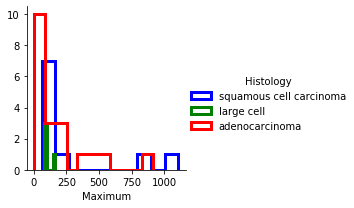

In [0]:
distplot_with_hue(data=PA_data, x='Maximum', hue='Histology', palette={'adenocarcinoma':'r', 'large cell':'g', 'squamous cell carcinoma':'b'},
                  hist=True, kde=False, hist_kws={'alpha':1,'histtype':'step', 'linewidth':3})

In [0]:
public_data1 = public_data.drop('Histology', axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

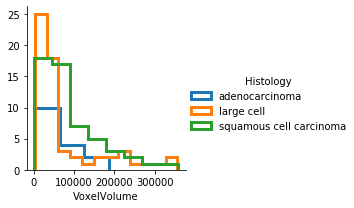

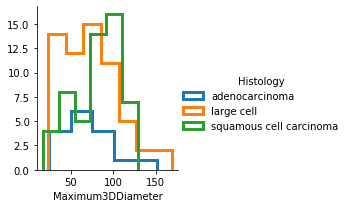

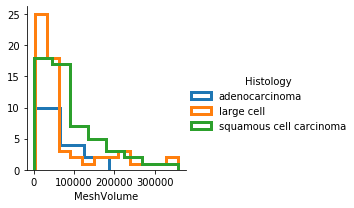

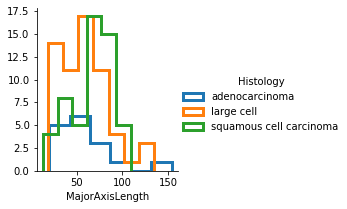

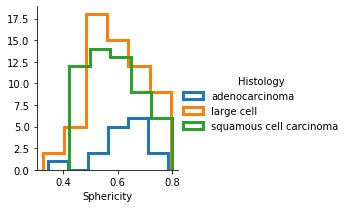

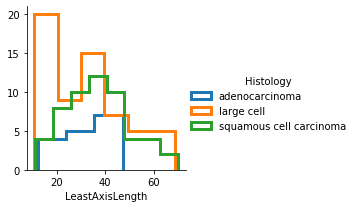

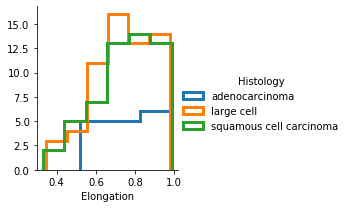

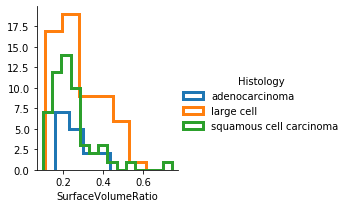

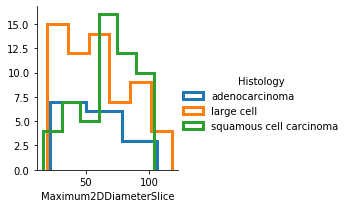

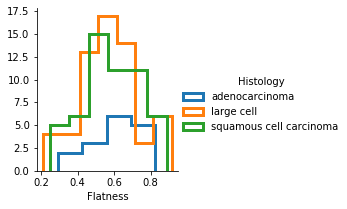

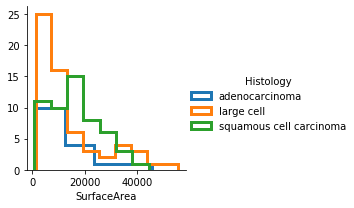

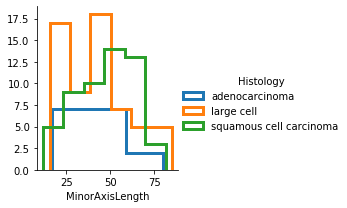

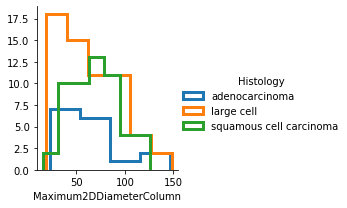

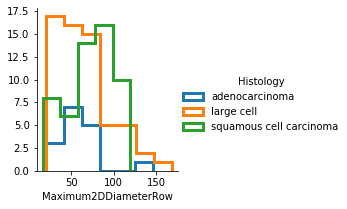

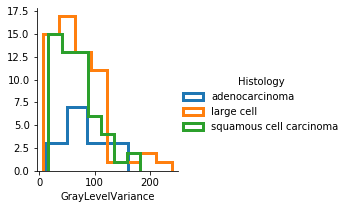

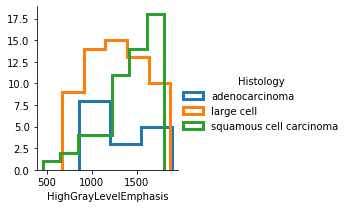

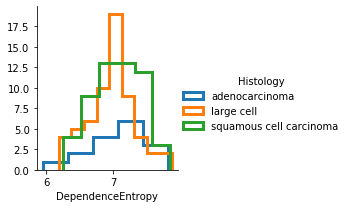

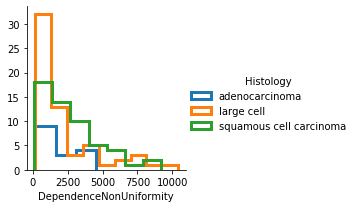

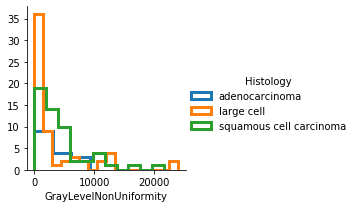

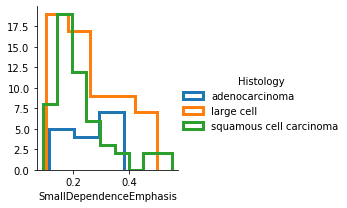

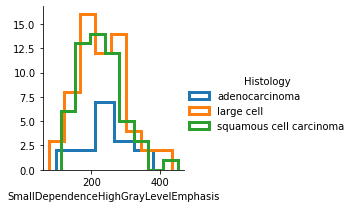

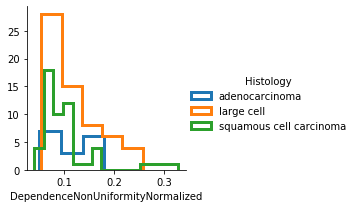

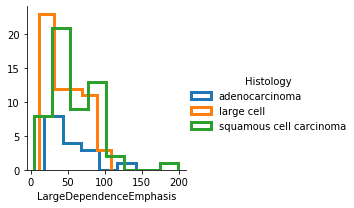

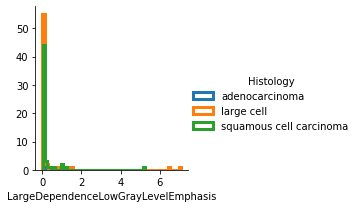

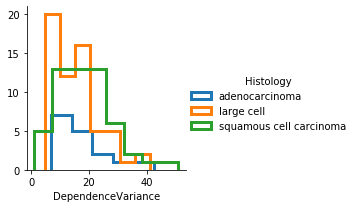

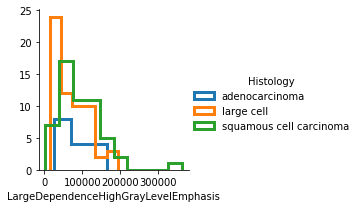

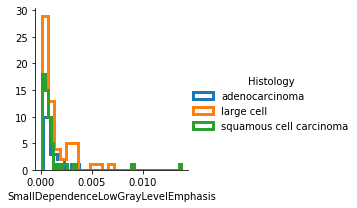

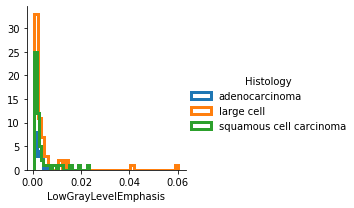

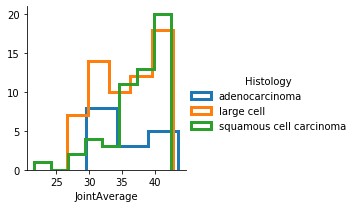

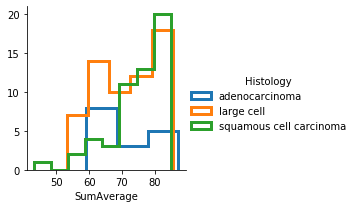

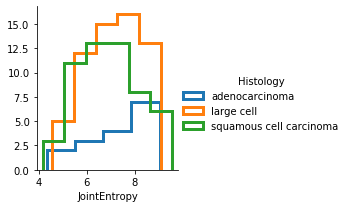

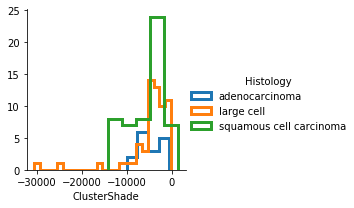

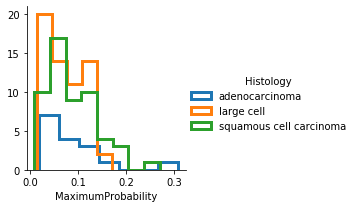

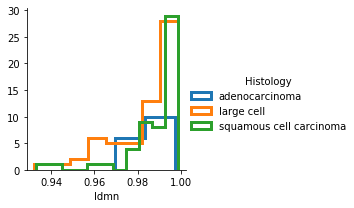

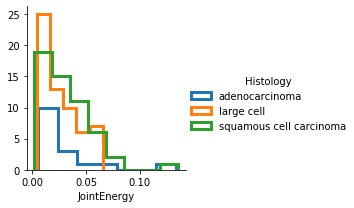

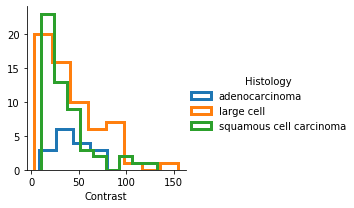

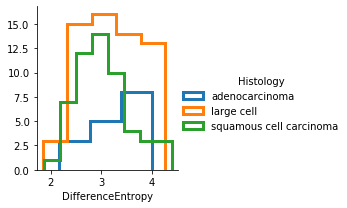

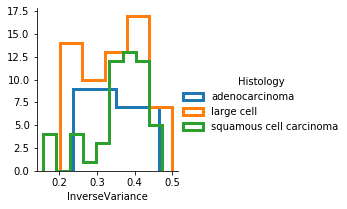

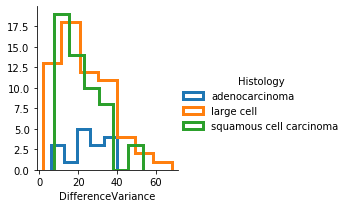

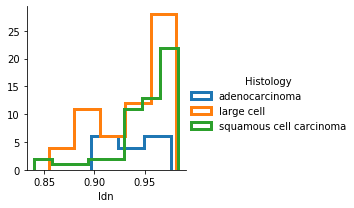

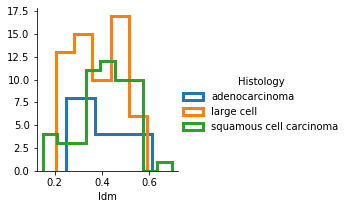

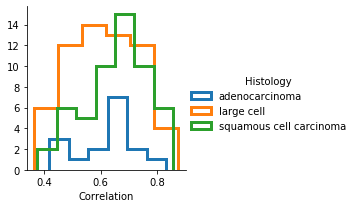

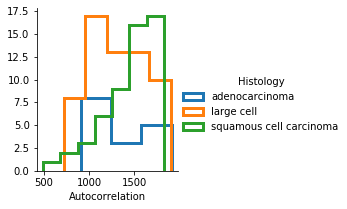

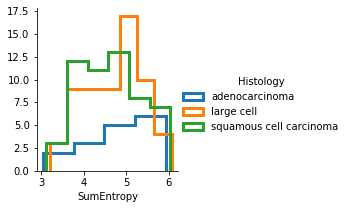

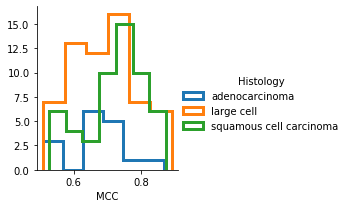

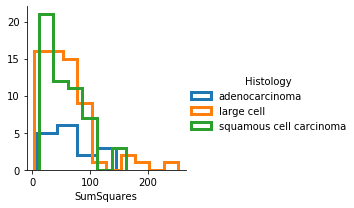

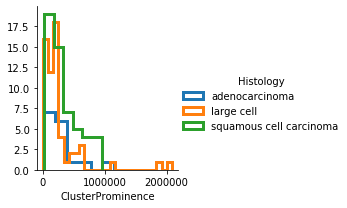

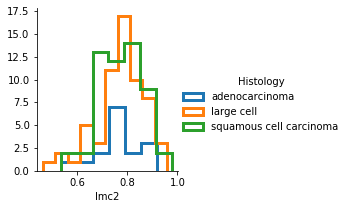

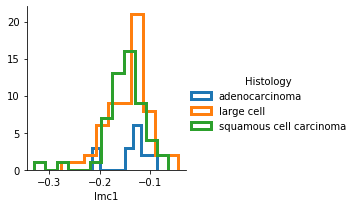

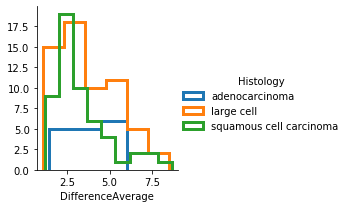

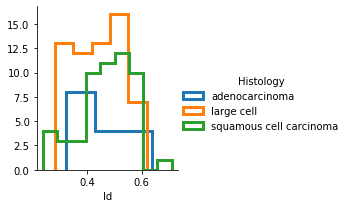

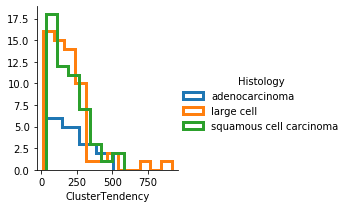

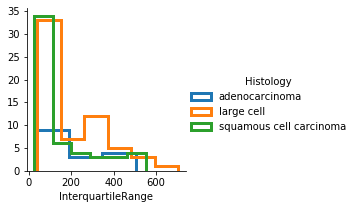

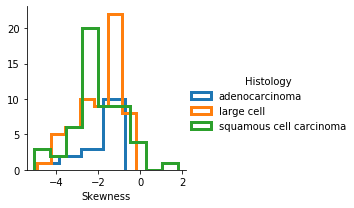

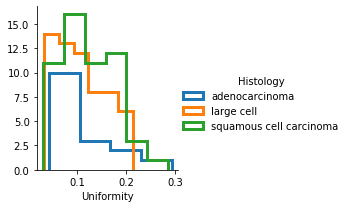

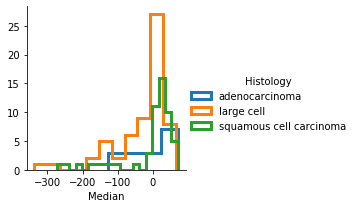

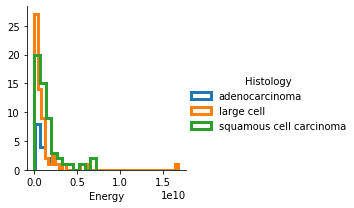

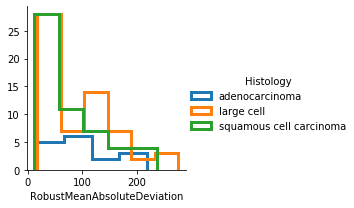

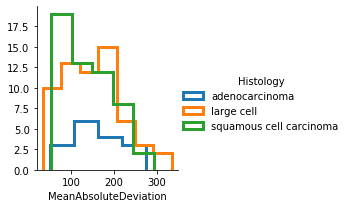

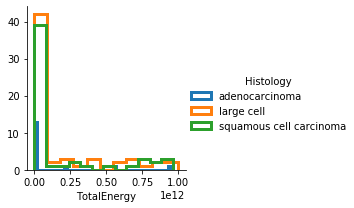

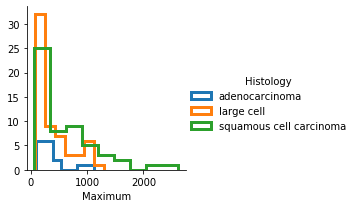

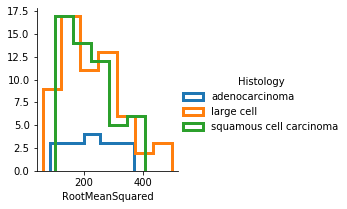

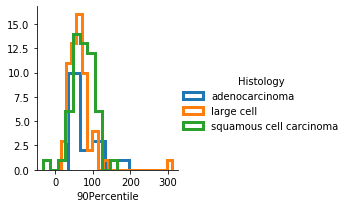

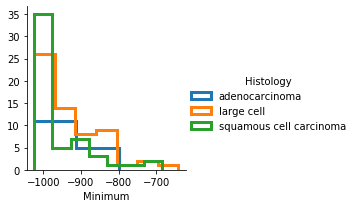

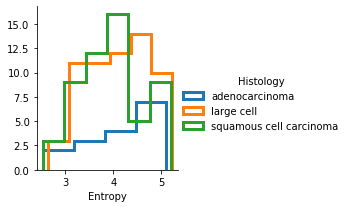

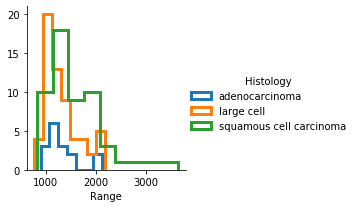

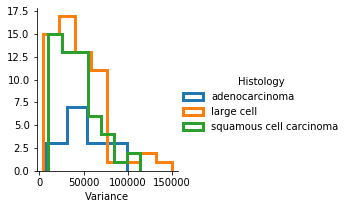

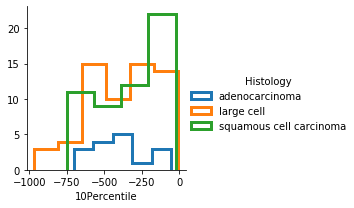

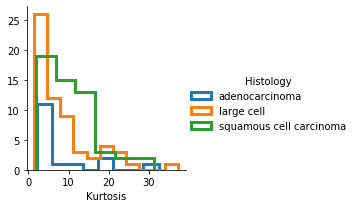

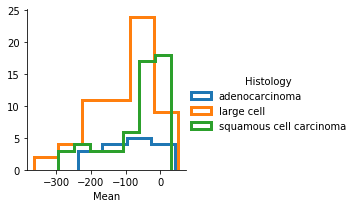

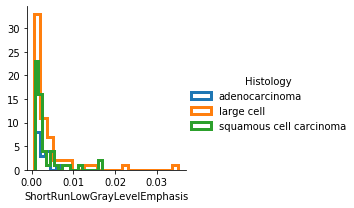

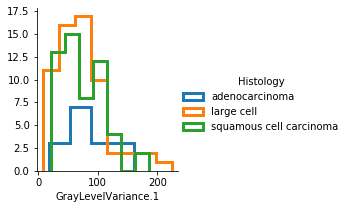

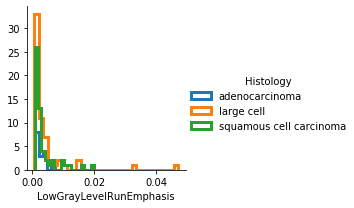

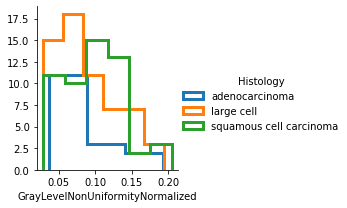

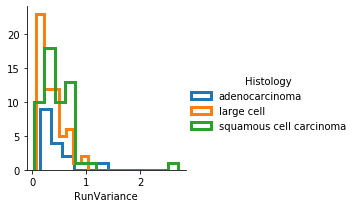

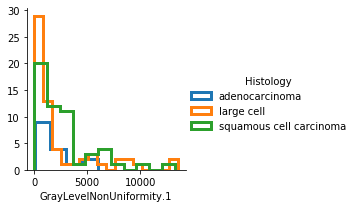

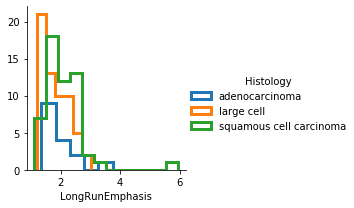

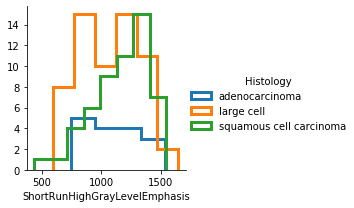

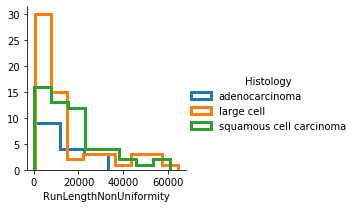

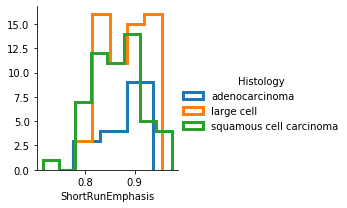

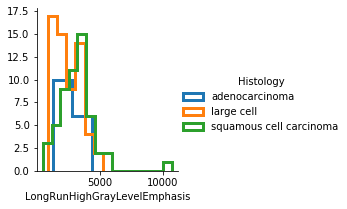

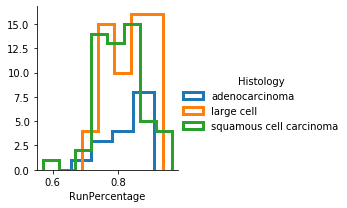

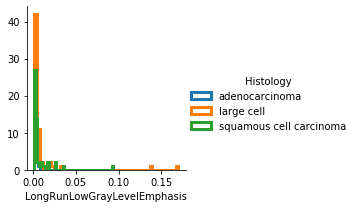

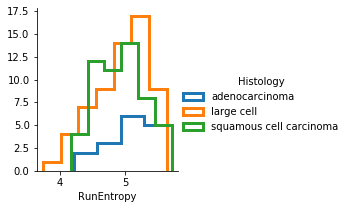

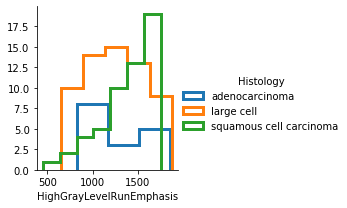

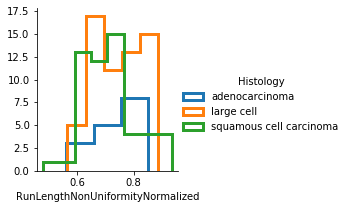

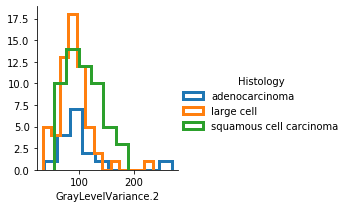

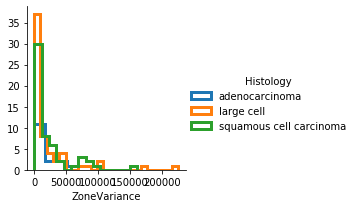

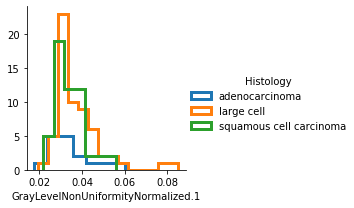

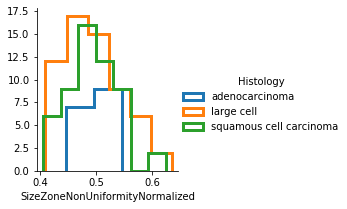

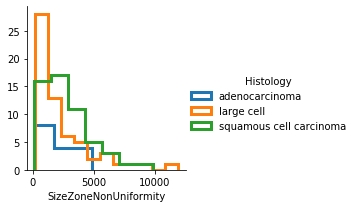

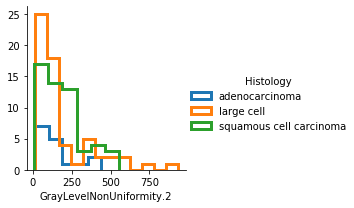

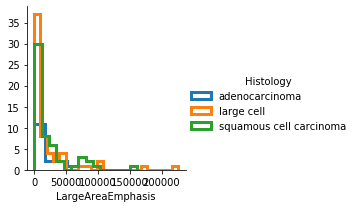

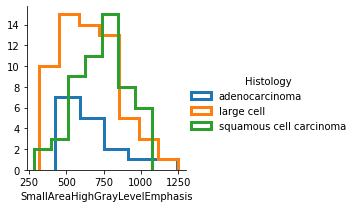

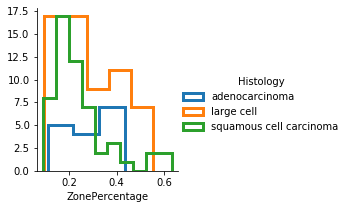

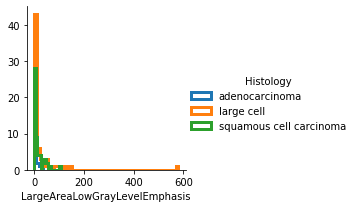

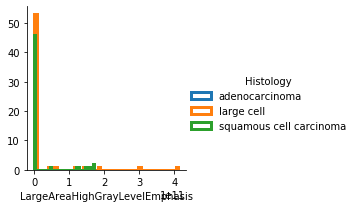

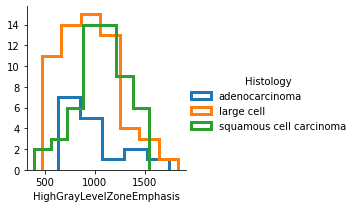

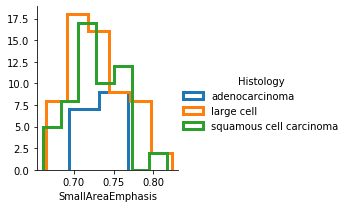

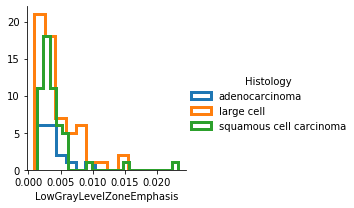

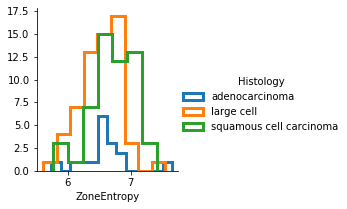

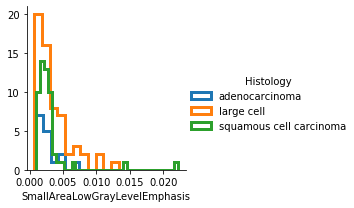

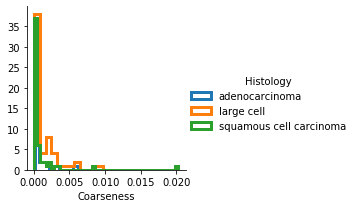

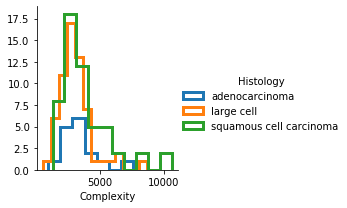

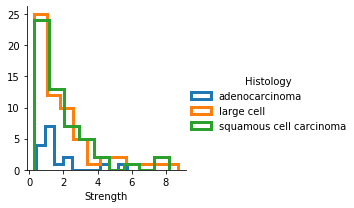

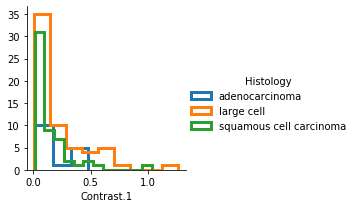

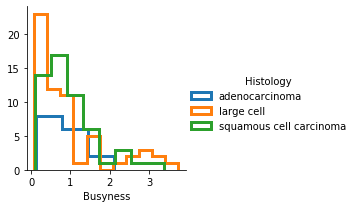

In [0]:
for column in public_data1.columns:
  distplot_with_hue(data=public_data, x=column, hue='Histology', hist=True, kde=False, hist_kws={'alpha':1,'histtype':'step', 'linewidth':3})

In [0]:
column

'Histology'

In [0]:
public_data1.head()

VoxelVolume  Maximum3DDiameter  ...  Contrast.1  Busyness
0   51905.377962          66.288317  ...    0.020920  1.306338
1   13432.502747          58.057539  ...    0.146173  0.253533
2   25843.872675          52.918217  ...    0.152919  0.611772
3   22152.709032          46.635312  ...    0.351327  0.564313
4  119385.805617          92.436320  ...    0.132602  1.804351

[5 rows x 107 columns]

#Comparare istogrammi per Public e PA

In [0]:
def distplot_with_hue(data=None, x=None, hue=None, row=None, col=None, legend=True, **kwargs):
    _, bins = np.histogram(data[x].dropna())
    g = sns.FacetGrid(data, hue=hue, row=row, col=col)
    g.map(sns.distplot, x, **kwargs)
    if legend and (hue is not None) and (hue not in [x, row, col]):
        g.add_legend(title=hue) 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

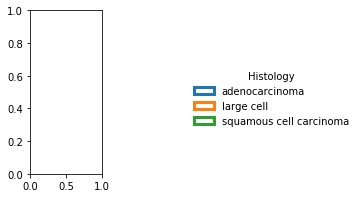

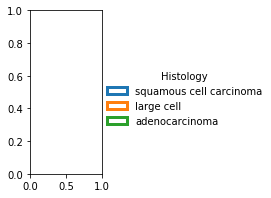

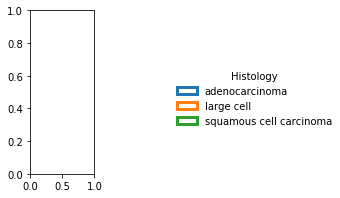

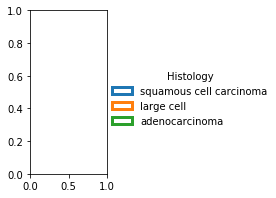

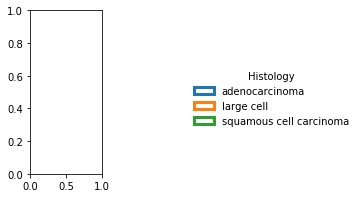

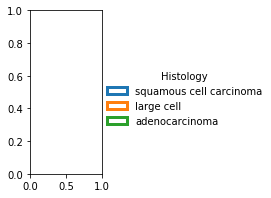

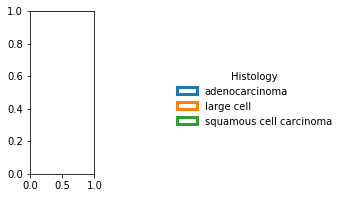

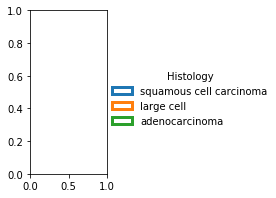

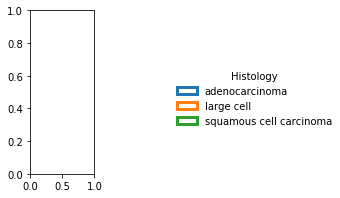

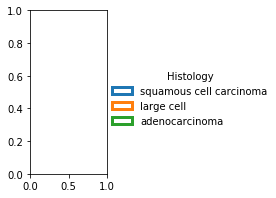

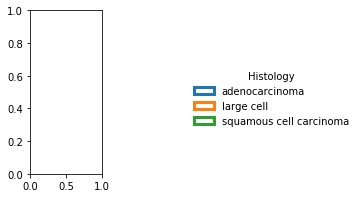

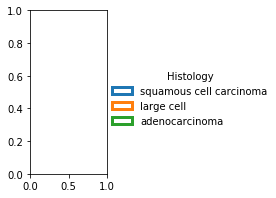

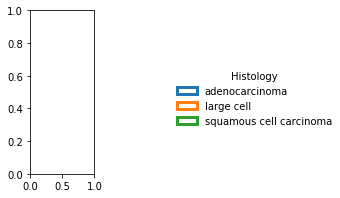

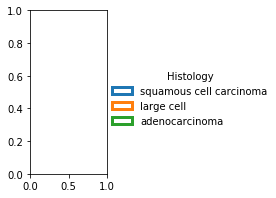

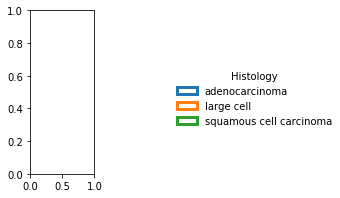

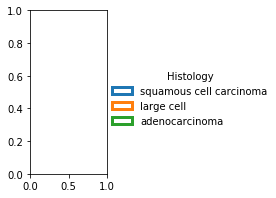

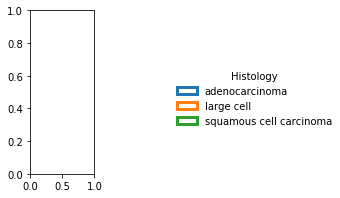

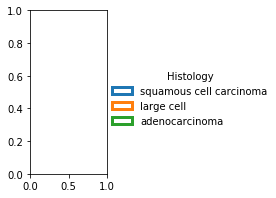

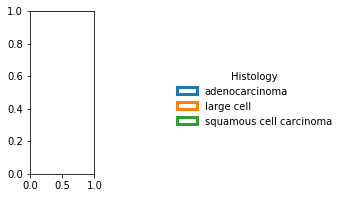

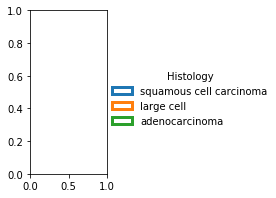

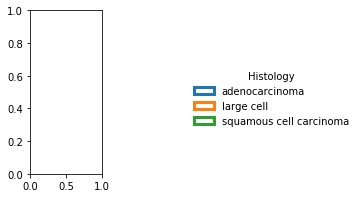

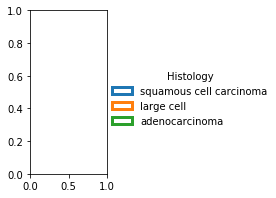

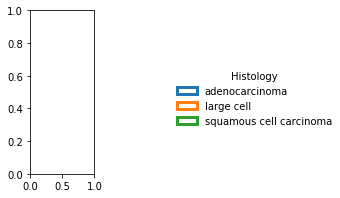

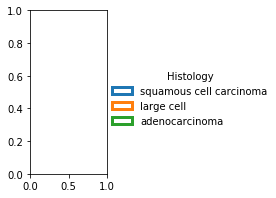

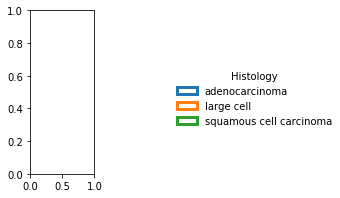

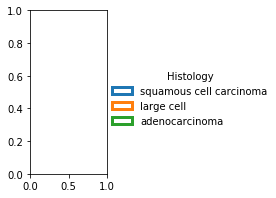

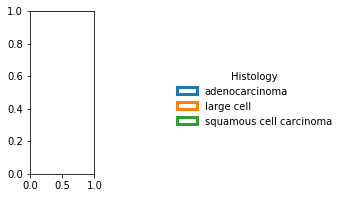

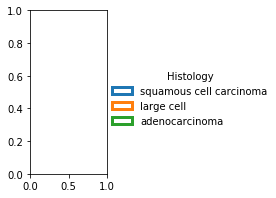

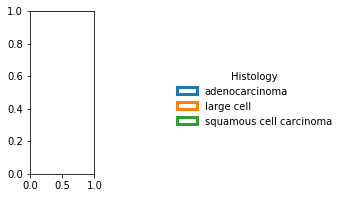

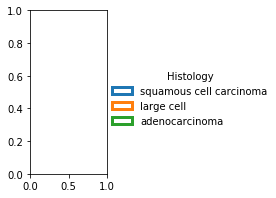

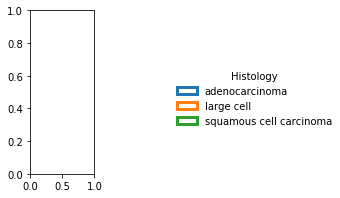

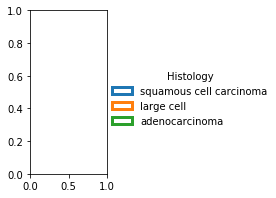

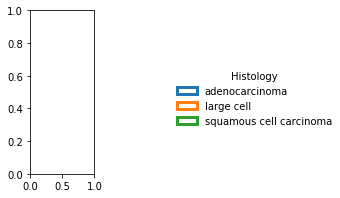

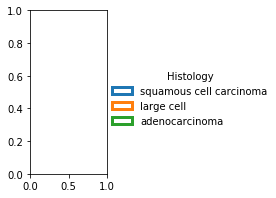

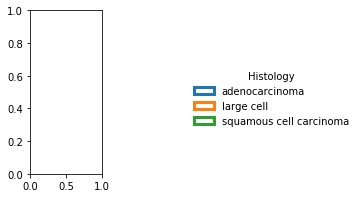

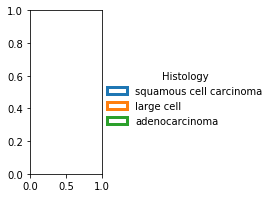

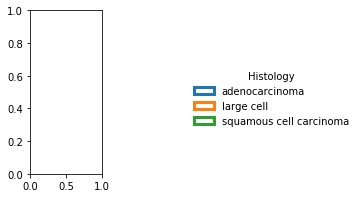

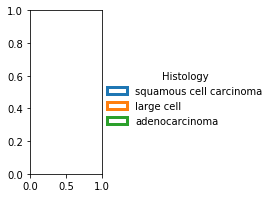

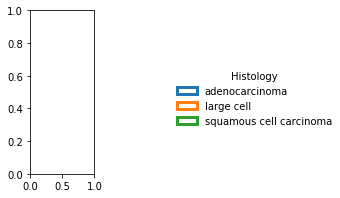

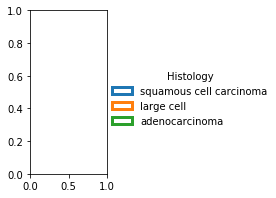

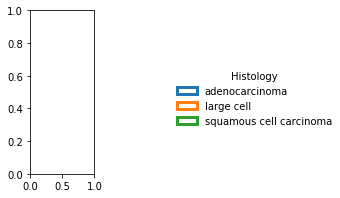

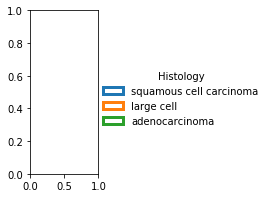

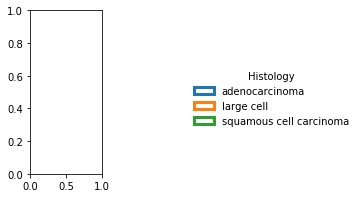

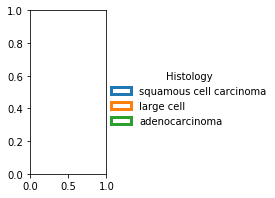

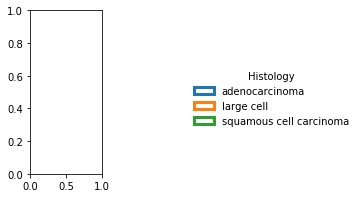

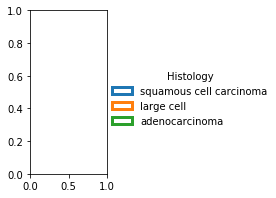

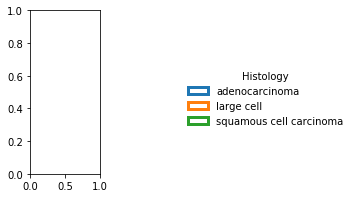

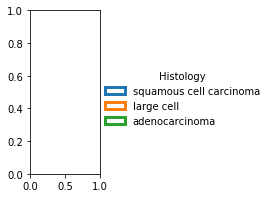

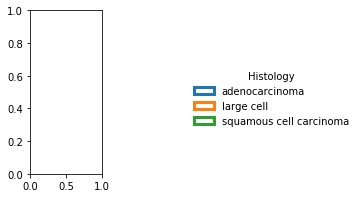

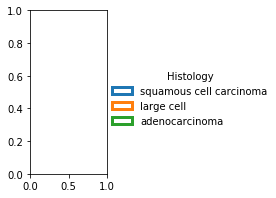

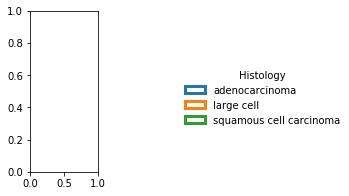

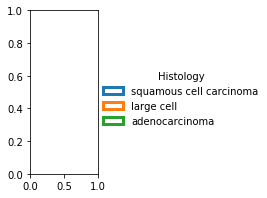

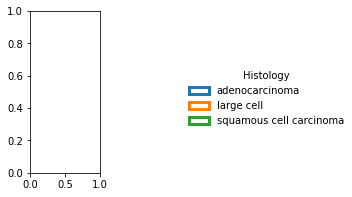

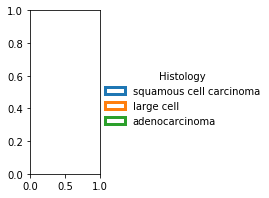

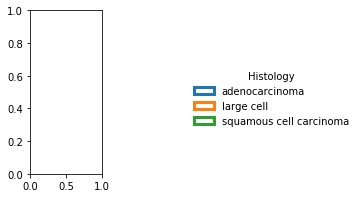

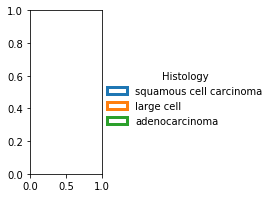

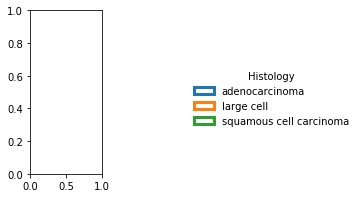

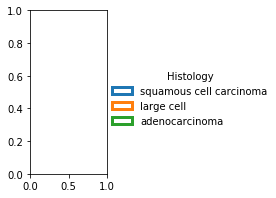

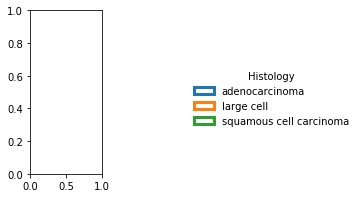

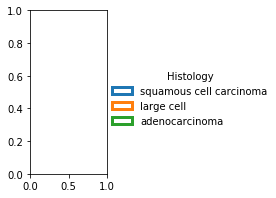

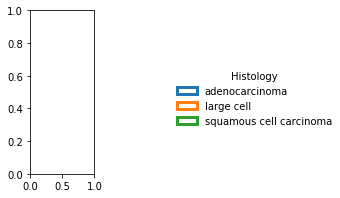

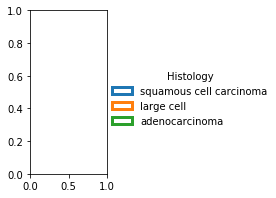

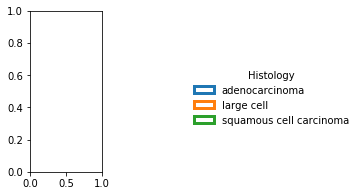

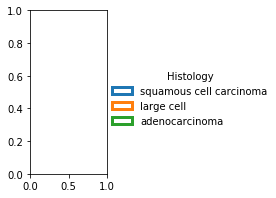

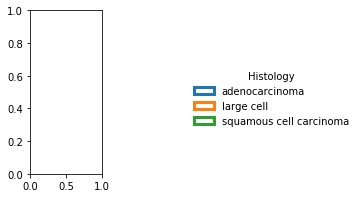

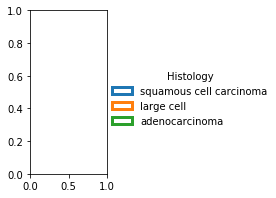

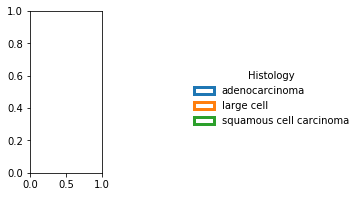

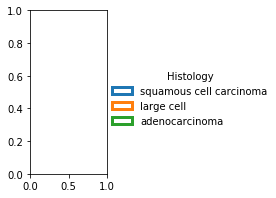

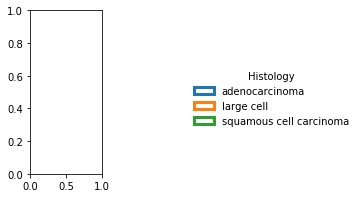

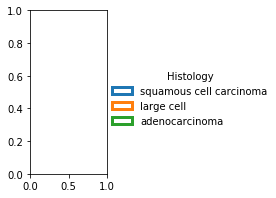

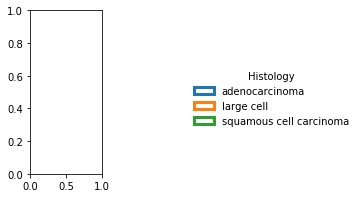

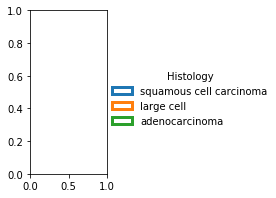

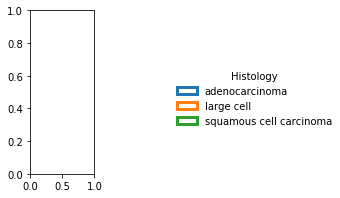

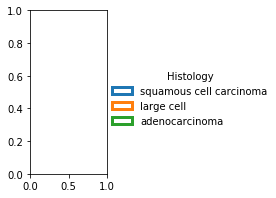

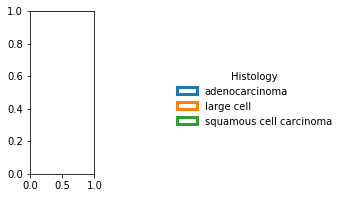

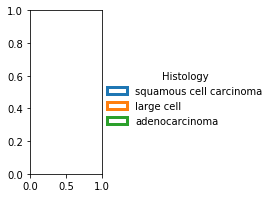

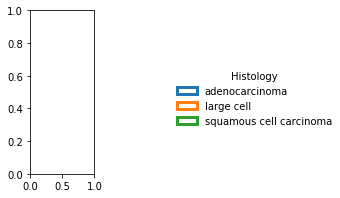

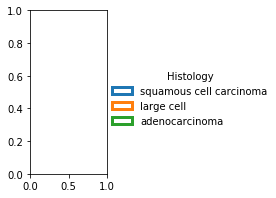

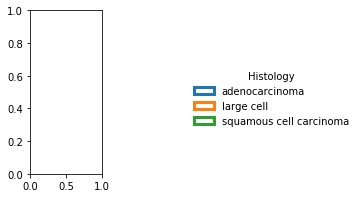

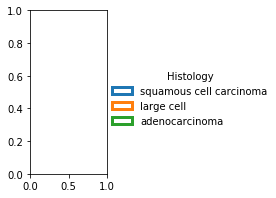

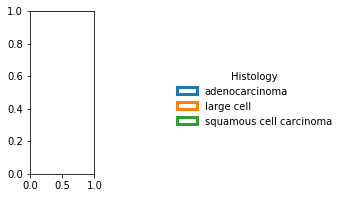

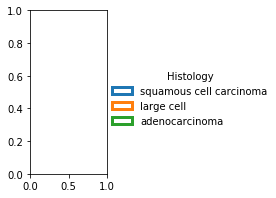

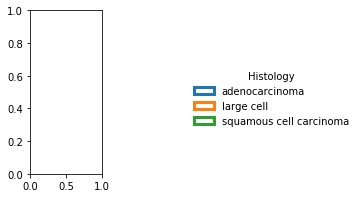

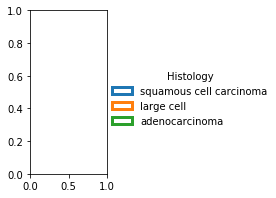

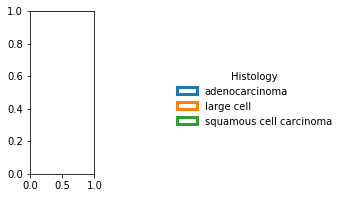

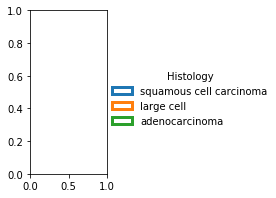

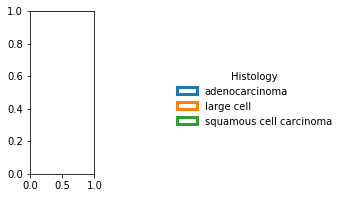

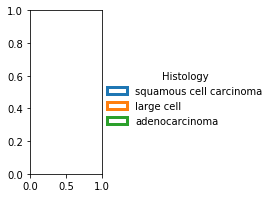

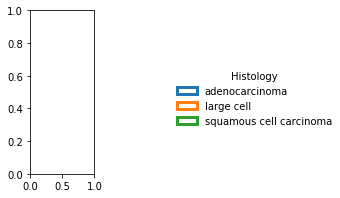

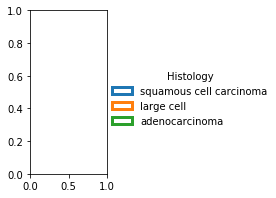

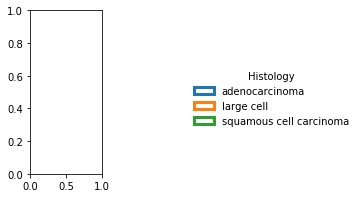

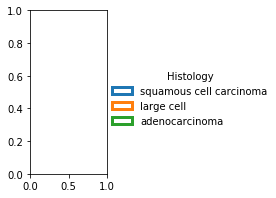

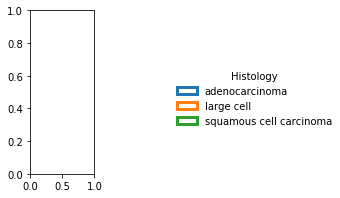

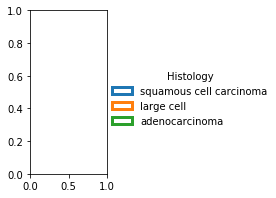

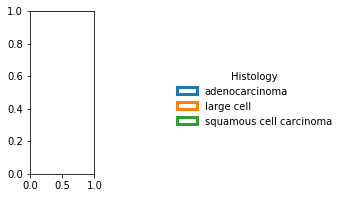

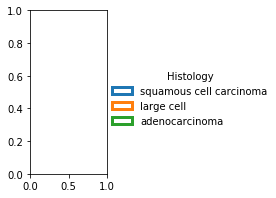

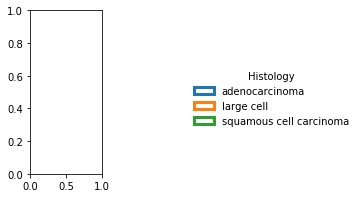

Error in callback <function flush_figures at 0x7f228efd59d8> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
for column in public_data1.columns:
  distplot_with_hue(data=public_data, x=column, hue='Histology', hist=True, kde=False, hist_kws={'alpha':1,'histtype':'step', 'linewidth':3})
  plt.subplot(1,2,1)
  distplot_with_hue(data=PA_data, x=column, hue='Histology', hist=True, kde=False, hist_kws={'alpha':1,'histtype':'step', 'linewidth':3})
  plt.subplot(1,2,2)


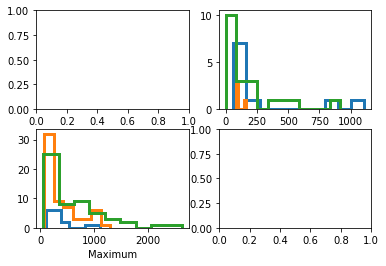

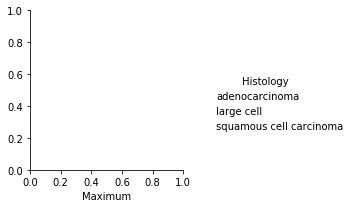

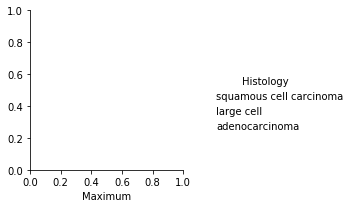

In [0]:
f, axes = plt.subplots(2,2)
  
distplot_with_hue(data=public_data, x='Maximum', hue='Histology', hist=True, kde=False, hist_kws={'alpha':1,'histtype':'step', 'linewidth':3}, ax=axes[1, 0])
distplot_with_hue(data=PA_data, x='Maximum', hue='Histology', hist=True, kde=False, hist_kws={'alpha':1,'histtype':'step', 'linewidth':3},  ax=axes[0, 1])


In [0]:
subplot_kws

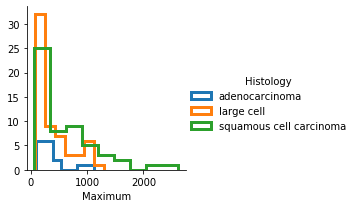

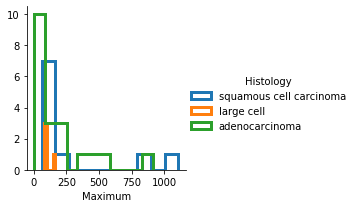

In [0]:
#f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)

g = sns.FacetGrid(public_data, hue="Histology")
g = g.map(sns.distplot, "Maximum", hist=True, kde=False, hist_kws={'alpha':1,'histtype':'step', 'linewidth':3})
g.add_legend(title='Histology') 

g = sns.FacetGrid(PA_data, hue="Histology")
g = g.map(sns.distplot, "Maximum", hist=True, kde=False, hist_kws={'alpha':1,'histtype':'step', 'linewidth':3})
g.add_legend(title='Histology') 

In [0]:
def distplot_with_hue(data=None, x=None, hue=None, row=None, col=None, legend=True, **kwargs):
    _, bins = np.histogram(data[x].dropna())
    g = sns.FacetGrid(data, hue=hue, row=row, col=col)
    g.map(sns.distplot, x, **kwargs)
    if legend and (hue is not None) and (hue not in [x, row, col]):
        g.add_legend(title=hue) 
    return g

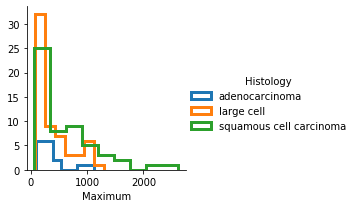

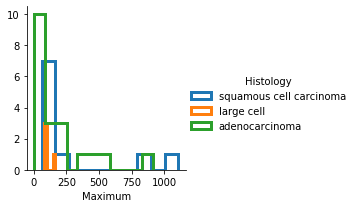

In [0]:
sns_plot1 = distplot_with_hue(data=public_data, x='Maximum', hue='Histology', hist=True, kde=False, hist_kws={'alpha':1,'histtype':'step', 'linewidth':3})

sns_plot2 = distplot_with_hue(data=PA_data, x='Maximum', hue='Histology', hist=True, kde=False, hist_kws={'alpha':1,'histtype':'step', 'linewidth':3})


In [0]:
length_fig, length_ax = plt.subplots()
sns.barplot(x='sepal_length', y='species', data=iris, ax=length_ax)
length_fig.savefig('ex1.pdf')

width_fig, width_ax = plt.subplots()
sns.barplot(x='sepal_width', y='species', data=iris, ax=width_ax)
width_fig.savefig('ex2.pdf')

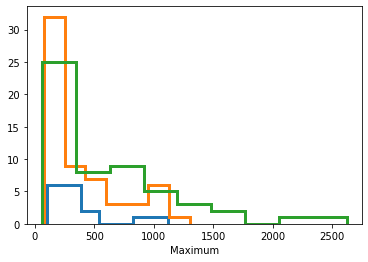

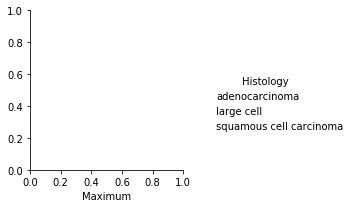

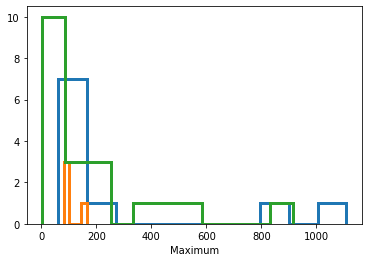

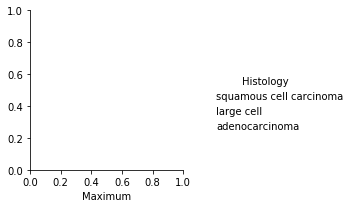

In [0]:
length_fig, length_ax = plt.subplots()
distplot_with_hue(data=public_data, x='Maximum', hue='Histology', hist=True, kde=False, hist_kws={'alpha':1,'histtype':'step', 'linewidth':3}, ax=length_ax)
width_fig, width_ax = plt.subplots()
distplot_with_hue(data=PA_data, x='Maximum', hue='Histology', hist=True, kde=False, hist_kws={'alpha':1,'histtype':'step', 'linewidth':3}, ax=width_ax)


#con Matplotlib


In [0]:
tot_data = pd.concat([public_data, PA_data], axis=0)
tot_label = pd.concat([public_labels, PA_labels], axis=0)

In [0]:
tot_A = tot_data[tot_data['Histology'] == 'adenocarcinoma']
tot_L = tot_data[tot_data['Histology'] == 'large cell']
tot_S = tot_data[tot_data['Histology'] == 'squamous cell carcinoma']

In [0]:
pu_A = public_data[public_data['Histology'] == 'adenocarcinoma']
pu_L = public_data[public_data['Histology'] == 'large cell']
pu_S = public_data[public_data['Histology'] == 'squamous cell carcinoma']

In [0]:
pa_A = PA_data[PA_data['Histology'] == 'adenocarcinoma']
pa_L = PA_data[PA_data['Histology'] == 'large cell']
pa_S = PA_data[PA_data['Histology'] == 'squamous cell carcinoma']

In [0]:
feat_tot = tot_data.iloc[:, 2]
feat_tot_A = tot_A.iloc[:, 2]
feat_tot_L = tot_L.iloc[:, 2]
feat_tot_S = tot_S.iloc[:, 2]

In [0]:
feat_pu_A = pu_A.iloc[:, 2]
feat_pu_L = pu_L.iloc[:, 2]
feat_pu_S = pu_S.iloc[:, 2]

In [0]:
feat_pa_A = pa_A.iloc[:, 2]
feat_pa_L = pa_L.iloc[:, 2]
feat_pa_S = pa_S.iloc[:, 2]

In [0]:
MAX = max(feat_tot)
MIN = min(feat_tot)

In [0]:
n_bins = 15

In [0]:
bin_edges = np.linspace(MIN, MAX, n_bins)

(array([ 2.,  4.,  9.,  4.,  4.,  4., 13., 11.,  7.,  3.,  3.,  0.,  0.,
         0.]), array([ 11.26151975,  22.52943279,  33.79734583,  45.06525887,
         56.33317191,  67.60108494,  78.86899798,  90.13691102,
        101.40482406, 112.6727371 , 123.94065014, 135.20856317,
        146.47647621, 157.74438925, 169.01230229]), <a list of 1 Patch objects>)

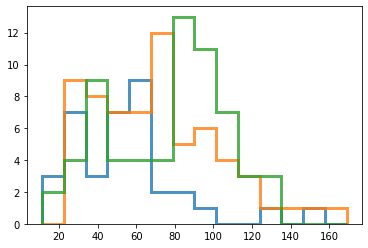

In [214]:
plt.hist(feat_tot_A, bins=bin_edges, histtype='step', stacked=False, alpha=0.8, linewidth=3)
plt.hist(feat_tot_L, bins=bin_edges, histtype='step', stacked=False, alpha=0.8, linewidth=3)
plt.hist(feat_tot_S, bins=bin_edges, histtype='step', stacked=False, alpha=0.8, linewidth=3)

(array([ 2.,  1.,  6.,  3.,  3.,  3., 12., 11.,  7.,  3.,  3.,  0.,  0.,
         0.]), array([ 11.26151975,  22.52943279,  33.79734583,  45.06525887,
         56.33317191,  67.60108494,  78.86899798,  90.13691102,
        101.40482406, 112.6727371 , 123.94065014, 135.20856317,
        146.47647621, 157.74438925, 169.01230229]), <a list of 1 Patch objects>)

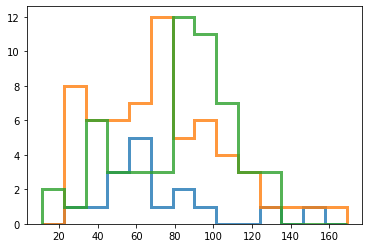

In [209]:
plt.hist(feat_pu_A, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3)
plt.hist(feat_pu_L, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3)
plt.hist(feat_pu_S, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3)

(array([0., 3., 3., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 11.26151975,  22.52943279,  33.79734583,  45.06525887,
         56.33317191,  67.60108494,  78.86899798,  90.13691102,
        101.40482406, 112.6727371 , 123.94065014, 135.20856317,
        146.47647621, 157.74438925, 169.01230229]),
 <a list of 1 Patch objects>)

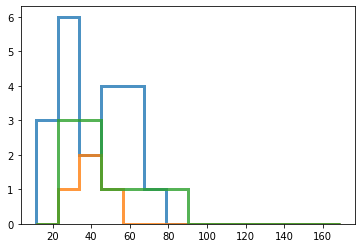

In [210]:
plt.hist(feat_pa_A, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3)
plt.hist(feat_pa_L, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3)
plt.hist(feat_pa_S, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3)

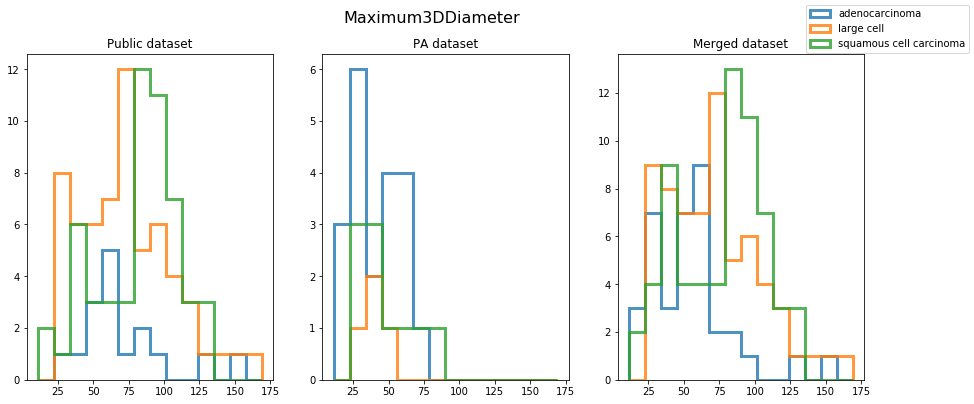

In [253]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.hist(feat_pu_A, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3, label='adenocarcinoma')
ax1.hist(feat_pu_L, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3, label='large cell')
ax1.hist(feat_pu_S, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3, label='squamous cell carcinoma')
ax1.set_title('Public dataset')


ax2.hist(feat_pa_A, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3)
ax2.hist(feat_pa_L, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3)
ax2.hist(feat_pa_S, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3)
ax2.set_title('PA dataset')



ax3.hist(feat_tot_A, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3)
ax3.hist(feat_tot_L, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3)
ax3.hist(feat_tot_S, bins=bin_edges, histtype='step', alpha=0.8, linewidth=3)
ax3.set_title('Merged dataset')

fig.suptitle(f'{tot_data.columns[2]}', horizontalalignment='center', fontsize=16)
fig.legend()
fig.set_figwidth(15)
fig.set_figheight(6)

#plt.close(fig)

In [229]:
tot_data.columns[2]

'Maximum3DDiameter'

In [254]:
tot_data

Histology    VoxelVolume  ...  Contrast.1  Busyness
0            adenocarcinoma   51905.377962  ...    0.020920  1.306338
1            adenocarcinoma   13432.502747  ...    0.146173  0.253533
2            adenocarcinoma   25843.872675  ...    0.152919  0.611772
3            adenocarcinoma   22152.709032  ...    0.351327  0.564313
4            adenocarcinoma  119385.805617  ...    0.132602  1.804351
..                      ...            ...  ...         ...       ...
29  squamous cell carcinoma    6592.266962  ...    0.085026  0.359230
30           adenocarcinoma    3010.031479  ...    0.295357  0.263438
31           adenocarcinoma    8683.195759  ...    0.594629  0.392208
32  squamous cell carcinoma   25939.914844  ...    0.059377  0.658985
33  squamous cell carcinoma   73401.852784  ...    0.064501  0.895047

[165 rows x 108 columns]

In [262]:
tot_data.columns[107]

'Busyness'

In [260]:
for i in np.arange(1,108):
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
